In [236]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [237]:
df1=pd.read_csv('yearly_groundnut_prod.csv')

In [238]:
df1

,year,groundnut_production
0,1966,128.00
1,1967,207.00
2,1968,169.00
3,1969,252.30
4,1970,302.90
5,1971,275.20
6,1972,185.90
7,1973,259.30
8,1974,286.40
9,1975,215.10


In [239]:
df1['year'] = pd.to_datetime(df1['year'].astype(str) + '-01-01')

In [240]:
df1.dtypes

year                    datetime64[ns]
groundnut_production           float64
dtype: object

In [241]:
# df1['year_dt'] = pd.to_datetime(df1['year'])

In [242]:
df1.set_index('year',inplace=True)

In [243]:
df1.head()

,groundnut_production
year,
1966-01-01,128.0
1967-01-01,207.0
1968-01-01,169.0
1969-01-01,252.3
1970-01-01,302.9


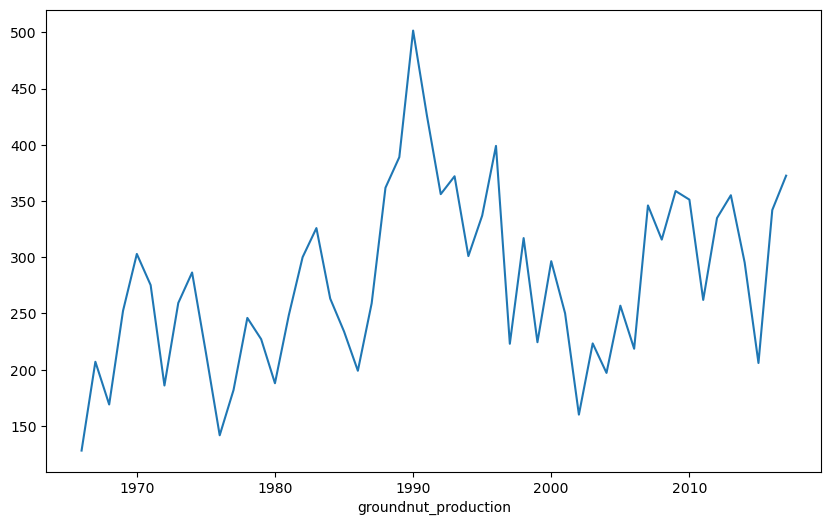

In [244]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.xlabel('year')
plt.xlabel('groundnut_production')
plt.plot(df1)

In [245]:
rolmean = df1.rolling(window=5).mean()
rolstd = df1.rolling(window=5).std()
print(rolmean,rolstd)

            groundnut_production
year                            
1966-01-01                   NaN
1967-01-01                   NaN
1968-01-01                   NaN
1969-01-01                   NaN
1970-01-01               211.840
1971-01-01               241.280
1972-01-01               237.060
1973-01-01               255.120
1974-01-01               261.940
1975-01-01               244.380
1976-01-01               217.660
1977-01-01               216.860
1978-01-01               214.200
1979-01-01               202.340
1980-01-01               196.900
1981-01-01               218.260
1982-01-01               241.880
1983-01-01               257.860
1984-01-01               265.080
1985-01-01               274.280
1986-01-01               264.400
1987-01-01               256.200
1988-01-01               263.380
1989-01-01               288.540
1990-01-01               342.076
1991-01-01               387.466
1992-01-01               406.884
1993-01-01               408.924
1994-01-01

In [246]:
rolmean = rolmean.iloc[4:,:]
rolstd = rolstd.iloc[4:,:]

In [247]:
print(rolmean,rolstd)

            groundnut_production
year                            
1970-01-01               211.840
1971-01-01               241.280
1972-01-01               237.060
1973-01-01               255.120
1974-01-01               261.940
1975-01-01               244.380
1976-01-01               217.660
1977-01-01               216.860
1978-01-01               214.200
1979-01-01               202.340
1980-01-01               196.900
1981-01-01               218.260
1982-01-01               241.880
1983-01-01               257.860
1984-01-01               265.080
1985-01-01               274.280
1986-01-01               264.400
1987-01-01               256.200
1988-01-01               263.380
1989-01-01               288.540
1990-01-01               342.076
1991-01-01               387.466
1992-01-01               406.884
1993-01-01               408.924
1994-01-01               391.324
1995-01-01               358.408
1996-01-01               353.018
1997-01-01               326.400
1998-01-01

Text(0.5, 1.0, 'rolling mean and std')

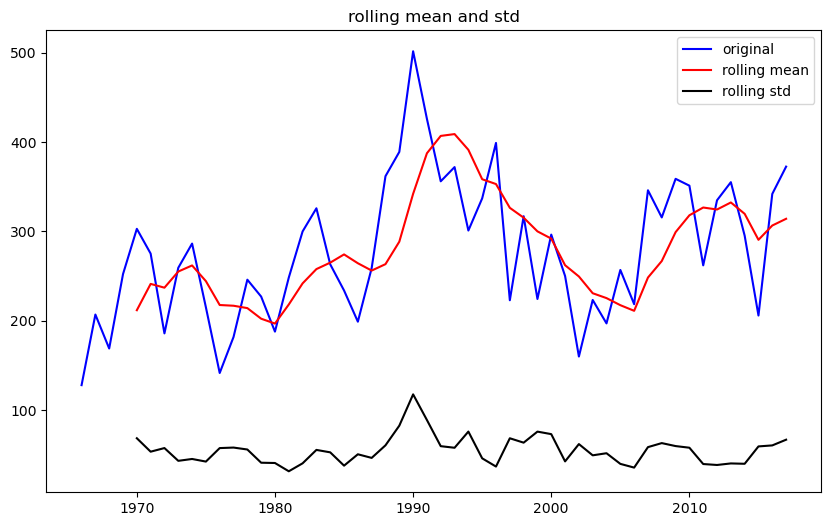

In [248]:
orig = plt.plot(df1,color="blue",label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and std')

In [249]:
from statsmodels.tsa.stattools import adfuller
print('dickey fuller test:')
dftest = adfuller(df1['groundnut_production'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Stistic','p value','#Lags used','Number of Observations used'])
for key, value in dftest[4].items():
    dfoutput['Criticl Value (%s)'%key] = value
    
print(dfoutput)

dickey fuller test:
Test Stistic                   -3.801955
p value                         0.002887
#Lags used                      0.000000
Number of Observations used    51.000000
Criticl Value (1%)             -3.565624
Criticl Value (5%)             -2.920142
Criticl Value (10%)            -2.598015
dtype: float64


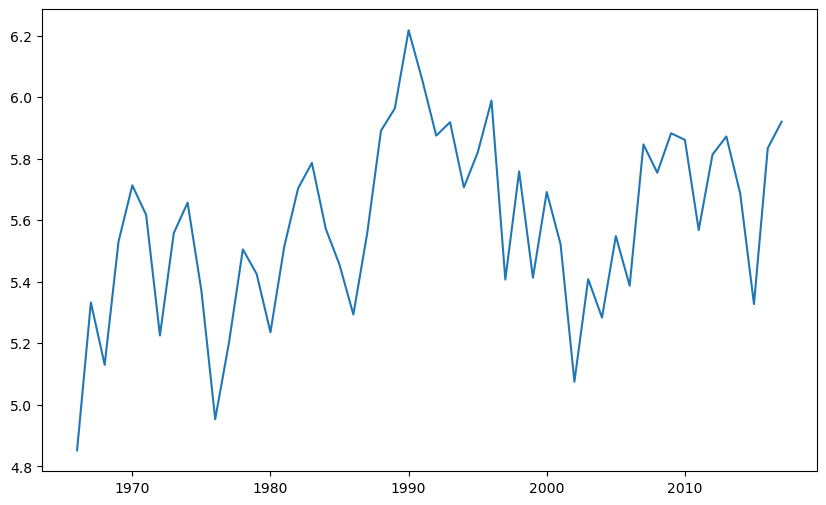

In [250]:
df_logscale = np.log(df1)
plt.plot(df_logscale)

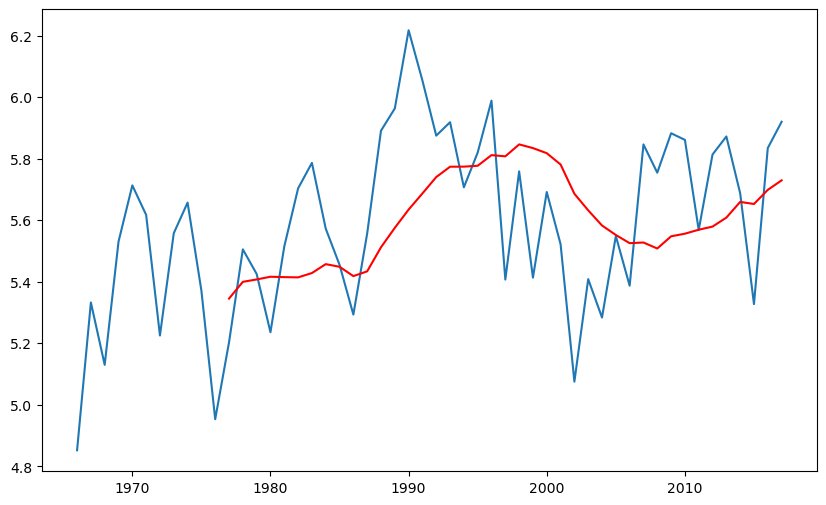

In [251]:
movingaverage = df_logscale.rolling(window=12).mean()
movingstd = df_logscale.rolling(window=12).std()
plt.plot(df_logscale)
plt.plot(movingaverage,color='red')

In [252]:
dflogscale_minusmivingaverage = df_logscale - movingaverage
dflogscale_minusmivingaverage.head(12)

dflogscale_minusmivingaverage.dropna(inplace=True)
dflogscale_minusmivingaverage.head(10)

,groundnut_production
year,
1977-01-01,-0.141903
1978-01-01,0.105530
1979-01-01,0.017866
1980-01-01,-0.180449
1981-01-01,0.099980
1982-01-01,0.289524
1983-01-01,0.358241
1984-01-01,0.115589
1985-01-01,0.006160


In [253]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingaverage = timeseries.rolling(window=3).mean()
    movingstd = timeseries.rolling(window=3).std()
    orig = plt.plot(timeseries,color='blue',label='original')
    mean = plt.plot(movingaverage,color='red',label='rolling mean')
    std = plt.plot(movingstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean & std')
    
    print('results of dickey fuller test:')
    dftest  =adfuller(timeseries['groundnut_production'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p value','#Lags Used','Number of Observatios Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)

results of dickey fuller test:
Test Statistic                -3.393578
p value                        0.011180
#Lags Used                     0.000000
Number of Observatios Used    40.000000
Critical value (1%)           -3.605565
Critical value (5%)           -2.937069
Critical value (10%)          -2.606986
dtype: float64


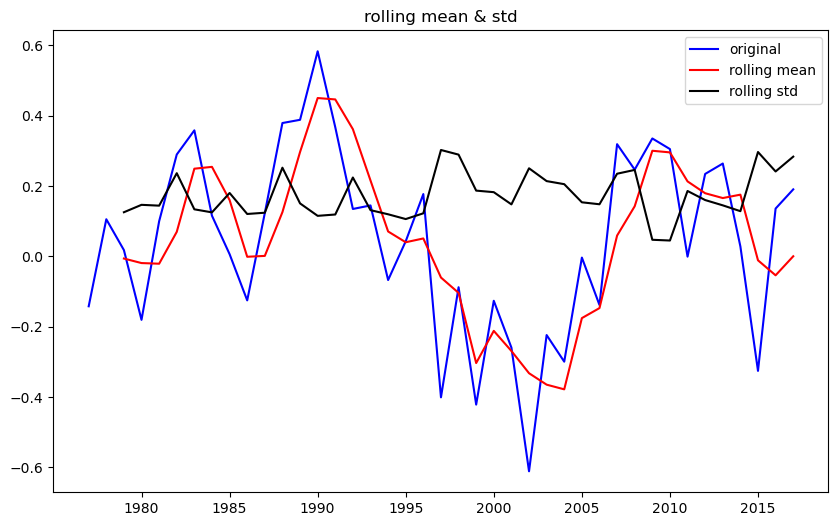

In [254]:
test_stationarity(dflogscale_minusmivingaverage)

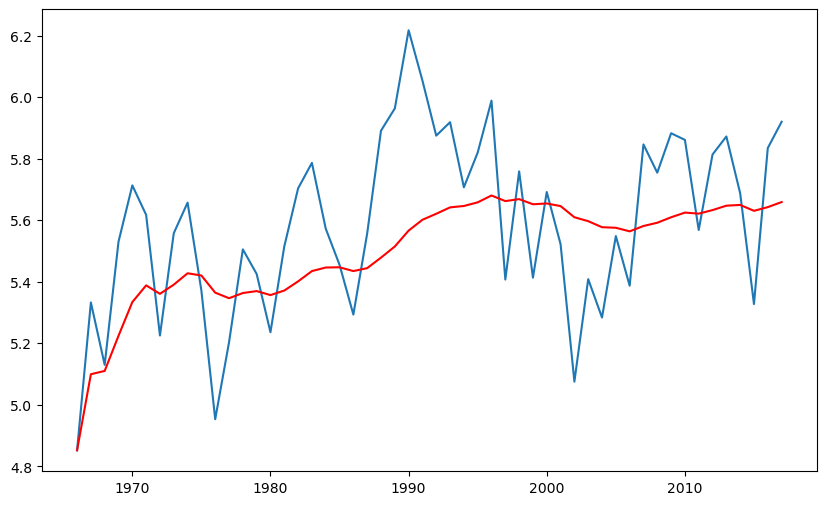

In [255]:
exponentialweighteddecayaverage = df_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df_logscale)
plt.plot(exponentialweighteddecayaverage,color='red')

results of dickey fuller test:
Test Statistic                -4.272400
p value                        0.000496
#Lags Used                     0.000000
Number of Observatios Used    51.000000
Critical value (1%)           -3.565624
Critical value (5%)           -2.920142
Critical value (10%)          -2.598015
dtype: float64


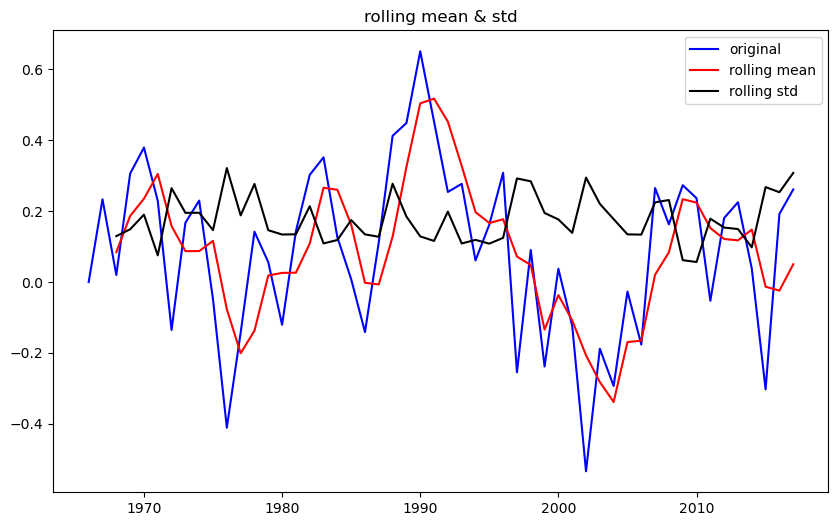

In [256]:
datalogscaleminusmovingexponentialdecayaverage = df_logscale - exponentialweighteddecayaverage
test_stationarity(datalogscaleminusmovingexponentialdecayaverage)

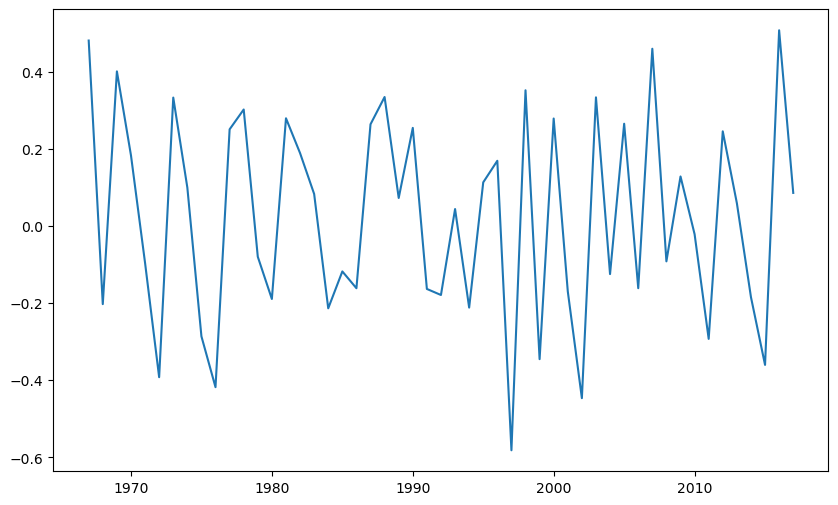

In [257]:
dflogdiffshifting = df_logscale - df_logscale.shift()
plt.plot(dflogdiffshifting)

results of dickey fuller test:
Test Statistic               -9.629404e+00
p value                       1.627432e-16
#Lags Used                    0.000000e+00
Number of Observatios Used    5.000000e+01
Critical value (1%)          -3.568486e+00
Critical value (5%)          -2.921360e+00
Critical value (10%)         -2.598662e+00
dtype: float64


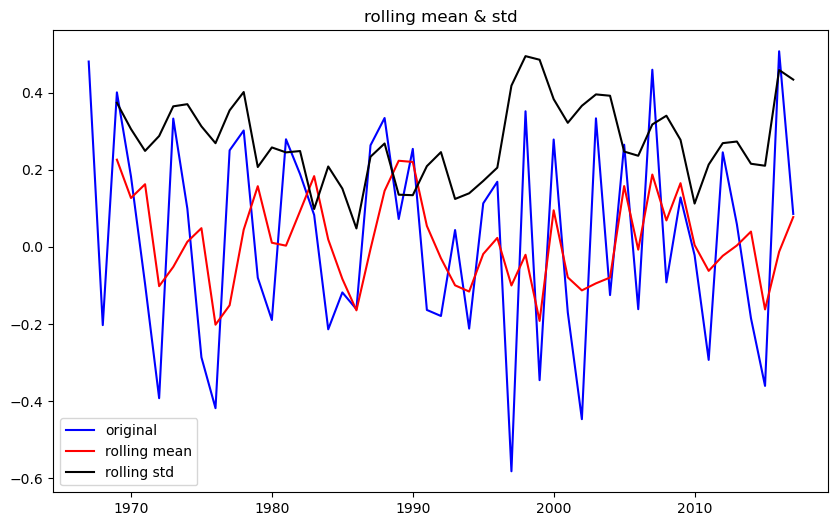

In [258]:
dflogdiffshifting.dropna(inplace=True)
test_stationarity(dflogdiffshifting)

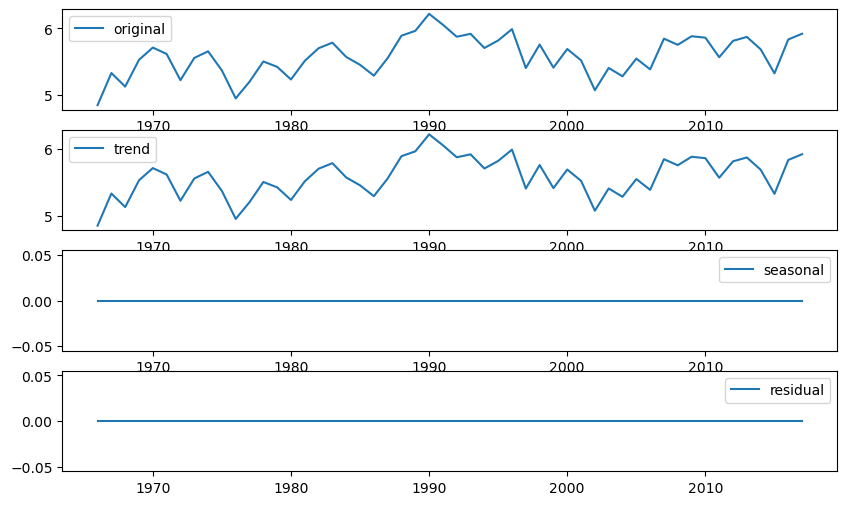

In [259]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logscale,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

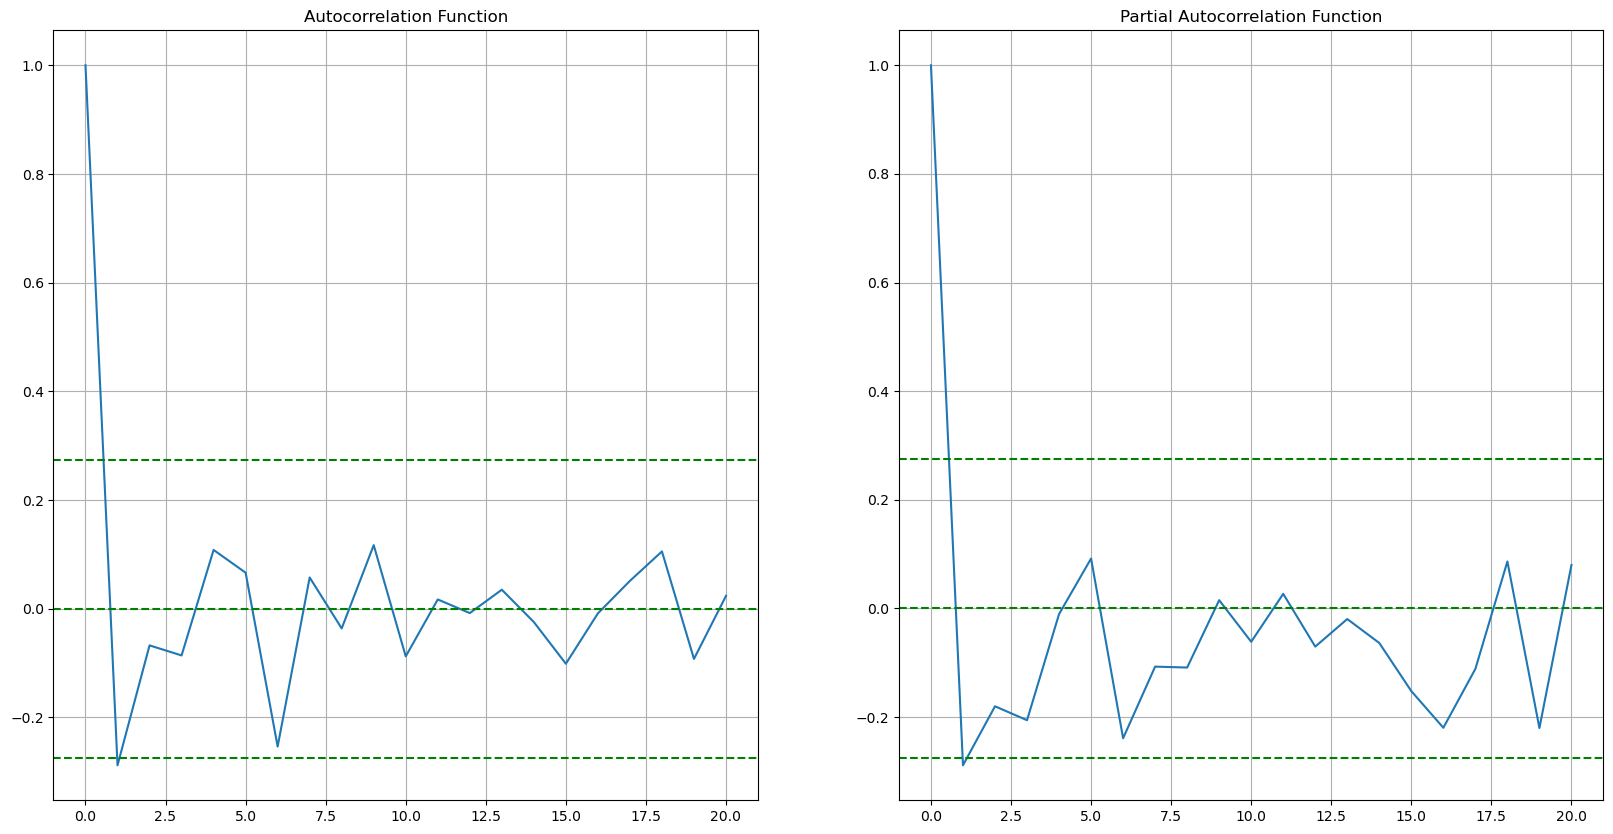

In [260]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(dflogdiffshifting, nlags=20)
lag_pacf=pacf(dflogdiffshifting, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.grid()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')
plt.grid()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting AR MODEL


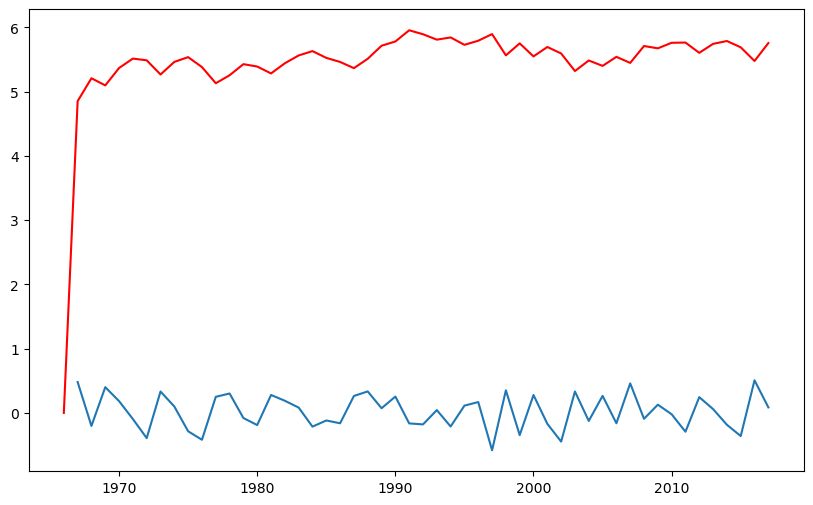

In [261]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_logscale, order=(1, 1, 1))
results_AR = model.fit()
plt.plot(dflogdiffshifting)
plt.plot(results_AR.fittedvalues,color='red')
print('plotting AR MODEL')

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting AR MODEL


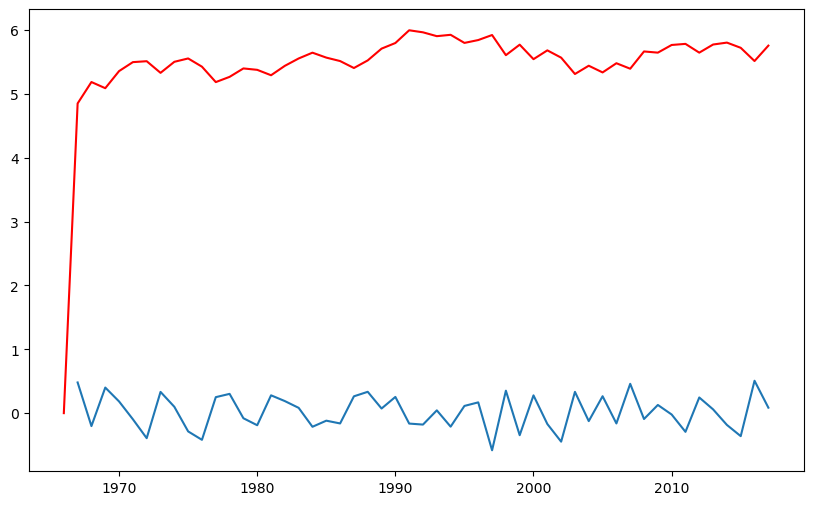

In [262]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_logscale is your time series data
model = ARIMA(df_logscale, order=(0, 1, 2))
results_MA = model.fit()

# Plot the results
plt.plot(dflogdiffshifting)
plt.plot(results_MA.fittedvalues, color='red')
print('plotting AR MODEL')

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting AR MODEL


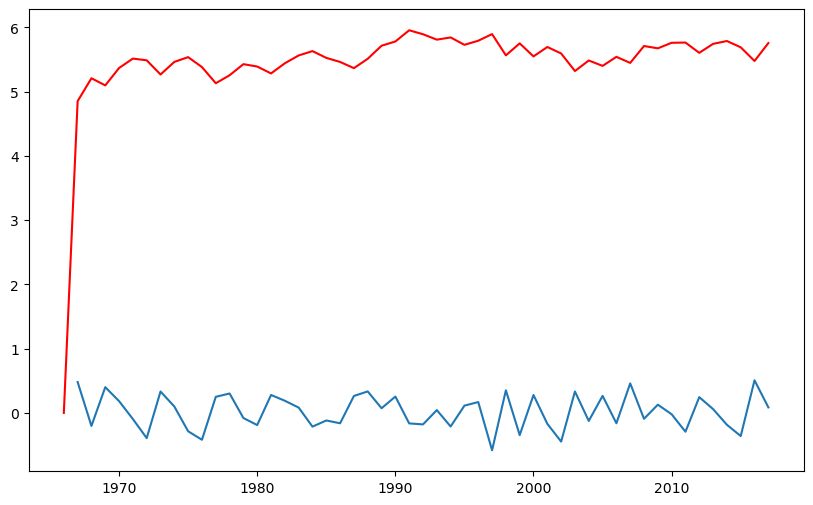

In [263]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_logscale is your time series data
model = ARIMA(df_logscale, order=(1, 1, 1))
results_ARIMA = model.fit()

# Plot the results
plt.plot(dflogdiffshifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
print('plotting AR MODEL')


In [264]:
predictions_arima_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_arima_diff.head()

year
1966-01-01    0.000000
1967-01-01    4.852030
1968-01-01    5.208642
1969-01-01    5.097547
1970-01-01    5.368441
dtype: float64

In [265]:
predictions_arima_diff_cumsum = predictions_arima_diff.cumsum()
predictions_arima_diff_cumsum.head()

year
1966-01-01     0.000000
1967-01-01     4.852030
1968-01-01    10.060672
1969-01-01    15.158219
1970-01-01    20.526660
dtype: float64

In [266]:
predictions_arima_log = pd.Series(df_logscale.iloc[:, 0],index=df_logscale.index)
predictions_arima_log = predictions_arima_log.add(predictions_arima_diff_cumsum,fill_value = 0)
predictions_arima_log.head()

year
1966-01-01     4.852030
1967-01-01    10.184749
1968-01-01    15.190571
1969-01-01    20.688838
1970-01-01    26.240063
dtype: float64

In [267]:
df_logscale

,groundnut_production
year,
1966-01-01,4.852030
1967-01-01,5.332719
1968-01-01,5.129899
1969-01-01,5.530619
1970-01-01,5.713403
1971-01-01,5.617498
1972-01-01,5.225209
1973-01-01,5.557986
1974-01-01,5.657389


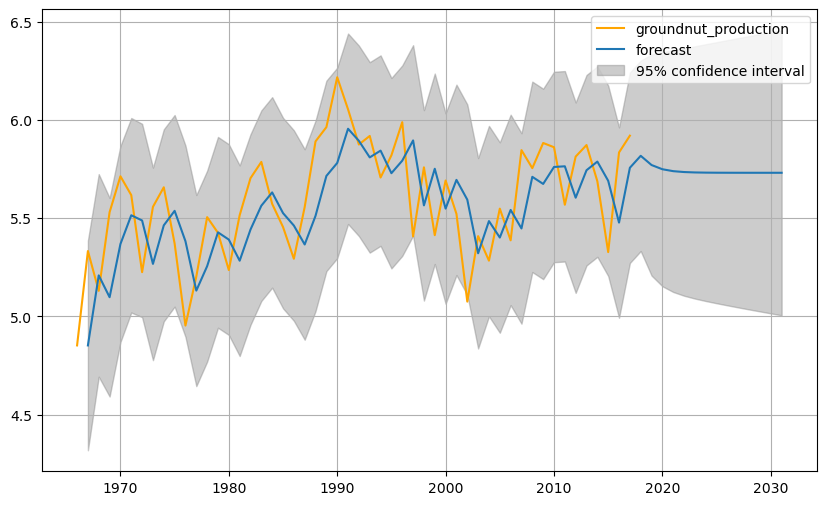

In [268]:
# Get predictions
pred = results_ARIMA.get_prediction(start=1, end=65)

# Get the predicted mean and the confidence intervals
predicted_mean = pred.predicted_mean
conf_int = pred.conf_int()

# Plot the results
plt.plot(df_logscale['groundnut_production'],color='orange',label='groundnut_production')
plt.plot(predicted_mean,label='forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.4,label='95% confidence interval')
plt.legend()
plt.grid()


In [269]:
x = results_ARIMA.forecast(steps=120)

In [270]:
def iterative_ARIMA_fit(series):

    ARIMA_fit_results = {}
    for AR in ARrange:
        for MA in MArange :
            for Diff in Diffrange:
                model = ARIMA(series, order = (AR,Diff,MA))
                fit_is_available = False
                results_ARIMA = None
                try:
                    results_ARIMA = model.fit(disp = -1, method = 'css')
                    fit_is_available = True
                except:
                    continue
                if fit_is_available:
                    safe_RSS = get_safe_RSS(series, results_ARIMA.fittedvalues)
                    ARIMA_fit_results['%d-%d-%d' % (AR,Diff,MA)]=[safe_RSS,results_ARIMA]

    return ARIMA_fit_results

In [271]:
def get_best_ARIMA_model_fit(series):

    if t.isstationary(series)[0]:
        ARIMA_fit_results = iterative_ARIMA_fit(series)
        best_ARIMA = min(ARIMA_fit_results, key = ARIMA_fit_results.get)
        
        return ARIMA_fit_results[best_ARIMA]

In [272]:
def get_safe_RSS(series, fitted_values):
    fitted_values_copy = fitted_values  # original fit is left untouched
    missing_index = list(set(series.index).difference(set(fitted_values_copy.index)))
    if missing_index:
        nan_series = pd.Series(index = pd.to_datetime(missing_index))
        fitted_values_copy = fitted_values_copy.append(nan_series)
        fitted_values_copy.sort_index(inplace = True)
        fitted_values_copy.fillna(method = 'bfill', inplace = True)  # fill holes
        fitted_values_copy.fillna(method = 'ffill', inplace = True)
    return sum((fitted_values_copy - series)**2)

In [273]:
df1.size

52